In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/plant_ai/'
sys.path.append(ROOT_PATH)

Mounted at /content/drive/


In [1]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.2
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
cftime==1.4.1
chainer==7.4.0
chardet==3.0.4
click==8.0.0
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
d

In [2]:
!pip install keras==2.1.6

     |████████████████████████████████| 348kB 15.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [3]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 35kB/s 
     |████████████████████████████████| 512kB 43.5MB/s 
     |████████████████████████████████| 3.8MB 20.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=ff8a3919cffc7070e16023509d3590a077df12676100d0ce96e4a68e9f133160
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing instal

In [4]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 37kB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,BatchNormalization
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils import np_utils
from keras.optimizers import Adam
import numpy as np 
import pickle
# import gc


with open(ROOT_PATH+'plants/train_data_crop224.pkl','rb') as f:
    x_train=pickle.load(f)

with open(ROOT_PATH+'plants/train_label.pkl','rb') as f:
    t_train=pickle.load(f)

with open(ROOT_PATH+'plants/test_data_crop224.pkl','rb') as f:
    x_test=pickle.load(f)

with open(ROOT_PATH+'plants/test_label.pkl','rb') as f:
    t_test=pickle.load(f)

with open(ROOT_PATH+'plants/plant_class.pkl','rb') as f:
    classes=pickle.load(f)

x_train=x_train.astype('float16')/255.
x_test=x_test.astype('float16')/255.
num_classes=len(classes)
t_train=np_utils.to_categorical(t_train,num_classes)

# t_train=np.vstack([t_train,t_train,t_train,t_train
#                 #    ,t_train,t_train,t_train,t_train
#                    ])

t_test=np_utils.to_categorical(t_test,num_classes)

# aug1=x_train.transpose(0,2,1,3)
# aug2=aug1[:,:,:,::-1]
# aug3=aug2.transpose(0,2,1,3)
# aug4=aug3[:,:,:,::-1]
# aug5=aug4.transpose(0,2,1,3)
# aug6=aug5[:,:,:,::-1]
# aug7=aug6.transpose(0,2,1,3)

# x_train=np.vstack([x_train,aug1,aug2,aug3
#                 #    ,aug4,aug5,aug6,aug7
#                    ])

# del aug1,aug2,aug3
# # ,aug4,aug5,aug6,aug7
# gc.collect()

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(302))
model.add(Activation('softmax'))

opt=Adam(lr=0.001)

model.compile(
    loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

model.fit(x_train,t_train,batch_size=128,epochs=100)

model.save(ROOT_PATH+'plant_cnn_crop224_keras216.h5')

scores=model.evaluate(x_test,t_test,verbose=1)
print('Test loss: ',scores[0])
print('Test accuracy: ',scores[1])

Epoch 1/100
19328/19328 [==============================] - 71s 4ms/step - loss: 5.4022 - acc: 0.0221
Epoch 2/100
19328/19328 [==============================] - 70s 4ms/step - loss: 4.9599 - acc: 0.0549
Epoch 3/100
19328/19328 [==============================] - 70s 4ms/step - loss: 4.7069 - acc: 0.0816
Epoch 4/100
19328/19328 [==============================] - 70s 4ms/step - loss: 4.5143 - acc: 0.0999
Epoch 5/100
19328/19328 [==============================] - 70s 4ms/step - loss: 4.3666 - acc: 0.1191
Epoch 6/100
19328/19328 [==============================] - 70s 4ms/step - loss: 4.2300 - acc: 0.1391
Epoch 7/100
19328/19328 [==============================] - 70s 4ms/step - loss: 4.1020 - acc: 0.1558
Epoch 8/100
19328/19328 [==============================] - 70s 4ms/step - loss: 4.0025 - acc: 0.1737
Epoch 9/100
19328/19328 [==============================] - 70s 4ms/step - loss: 3.8873 - acc: 0.1903
Epoch 10/100
19328/19328 [==============================] - 70s 4ms/step - loss: 3.7872 - a

predict: キセワタ:0.54,シロバナサクラタデ:0.11,ドクダミ:0.04
correct: キセワタ


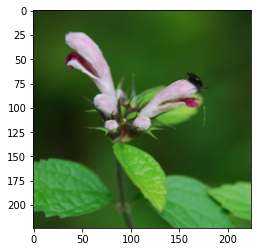

In [5]:
from keras.models import load_model
import numpy as np 
import pickle
import matplotlib.pyplot as plt


with open(ROOT_PATH+'plants/train_data_crop224.pkl','rb') as f:
    x_train=pickle.load(f)

with open(ROOT_PATH+'plants/train_label.pkl','rb') as f:
    t_train=pickle.load(f)

# with open(ROOT_PATH+'plants/test_data_crop224.pkl','rb') as f:
#     x_test=pickle.load(f)

# with open(ROOT_PATH+'plants/test_label.pkl','rb') as f:
#     t_test=pickle.load(f)

with open(ROOT_PATH+'plants/plant_class.pkl','rb') as f:
    classes=pickle.load(f)

model=load_model(ROOT_PATH+'plant_cnn_crop224.h5')
x_train=x_train.astype('f')/255
index=320
img=x_train[index]
plt.imshow(img)
x=np.array([img])
y=model.predict(x,batch_size=1)
sort_y=sorted(y[0])[::-1]
z=np.argsort(y[0])[::-1]
print('predict: {}:{:.2f},{}:{:.2f},{}:{:.2f}'.format(classes[z[0]],sort_y[0],classes[z[1]],sort_y[1],classes[z[2]],sort_y[2]))
print('correct: '+classes[t_train[index]])

In [4]:
!pip install coremltools==4.0

     |████████████████████████████████| 3.4MB 15.3MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp37-none-any.whl size=2458 sha256=2b43588f421c8db704df25cf0c278098d544549f5547abd0ef7b92c7191ecbe9
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr


In [6]:
import coremltools
import pickle

with open(ROOT_PATH+'plants/plant_class.pkl','rb') as f:
    classes=pickle.load(f)

coreml_model=coremltools.converters.keras.convert(
    ROOT_PATH+'plant_cnn_crop224_keras216.h5',input_names='image',image_input_names='image',
    output_names='Prediction',class_labels=classes,image_scale=1/255.0)

coreml_model.save(ROOT_PATH+'plant_cnn_crop224_keras216.mlmodel')

0 : conv2d_7_input, <keras.engine.topology.InputLayer object at 0x7f7f03375e90>
1 : conv2d_7, <keras.layers.convolutional.Conv2D object at 0x7f7f03375f90>
2 : batch_normalization_7, <keras.layers.normalization.BatchNormalization object at 0x7f7f0451f850>
3 : activation_8, <keras.layers.core.Activation object at 0x7f7f0451f690>
4 : conv2d_8, <keras.layers.convolutional.Conv2D object at 0x7f7f032ced90>
5 : batch_normalization_8, <keras.layers.normalization.BatchNormalization object at 0x7f7f032cec90>
6 : activation_9, <keras.layers.core.Activation object at 0x7f7f032a5e90>
7 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x7f7f032aa850>
8 : conv2d_9, <keras.layers.convolutional.Conv2D object at 0x7f7f032dc350>
9 : batch_normalization_9, <keras.layers.normalization.BatchNormalization object at 0x7f7ef009ec10>
10 : activation_10, <keras.layers.core.Activation object at 0x7f7f032d0550>
11 : conv2d_10, <keras.layers.convolutional.Conv2D object at 0x7f7ef00871d0>
12 : batch_n